In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\hp\Downloads\spam.csv', encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4756,ham,"hey, looks like I was wrong and one of the kap...",NaN,NaN,NaN
4207,ham,Or i go home first lar Ì_ wait 4 me lor.. I pu...,NaN,NaN,NaN
14,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,NaN,NaN,NaN
4975,ham,You are gorgeous! keep those pix cumming :) th...,NaN,NaN,NaN
2420,ham,Oic... Then better quickly go bathe n settle d...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [7]:
##1.DATA CLEANING

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
3070,ham,Apart from the one i told you about yesterday?
564,ham,"Fuck babe ... I miss you already, you know ? C..."
2163,ham,hi my darlin im on my way to London and we hav...
5098,spam,TheMob>Hit the link to get a premium Pink Pant...
4996,ham,Esplanade lor. Where else...


In [8]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
df.sample(5)

,target,text
3714,ham,"I am late,so call you tomorrow morning.take ca..."
3210,ham,"OH YEAH,AND HAV A GREAT TIME IN NEWQUAY-SEND M..."
739,ham,Haha mayb u're rite... U know me well. Da feel...
2044,ham,I can send you a pic if you like :)
1646,ham,Thts wat Wright Brother did to fly..


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(403)

In [15]:
df=df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.shape

(5169, 2)

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

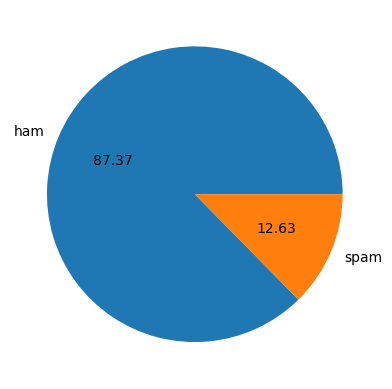

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [21]:
import nltk
print(nltk.data.path)

['C:\\Users\\hp/nltk_data', 'C:\\ProgramData\\anaconda3\\nltk_data', 'C:\\ProgramData\\anaconda3\\share\\nltk_data', 'C:\\ProgramData\\anaconda3\\lib\\nltk_data', 'C:\\Users\\hp\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [22]:
import sys
print(sys.executable)

C:\ProgramData\anaconda3\python.exe


In [26]:
!"C:\ProgramData\anaconda3\python.exe" -m pip install nltk --user

In [23]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [24]:
df['num_characters']=df['text'].apply(len)

In [25]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [33]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

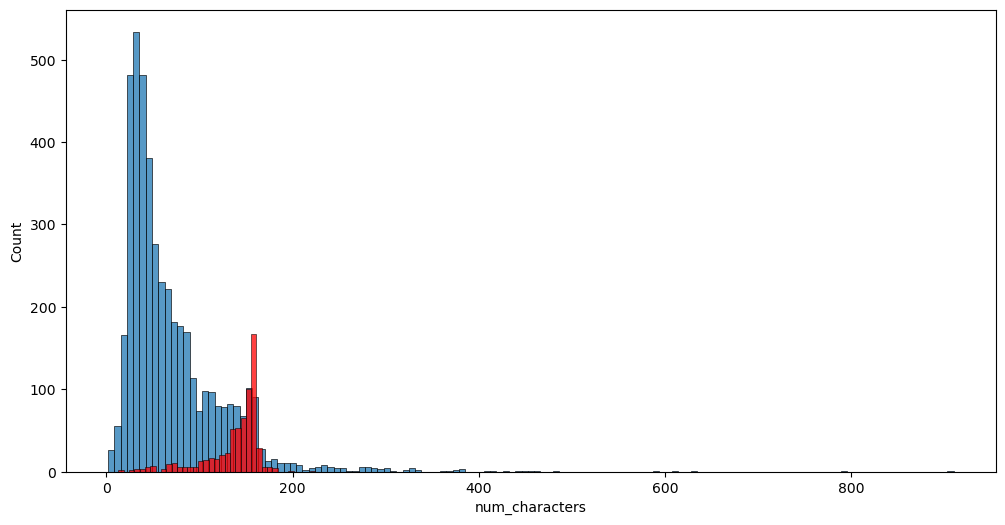

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

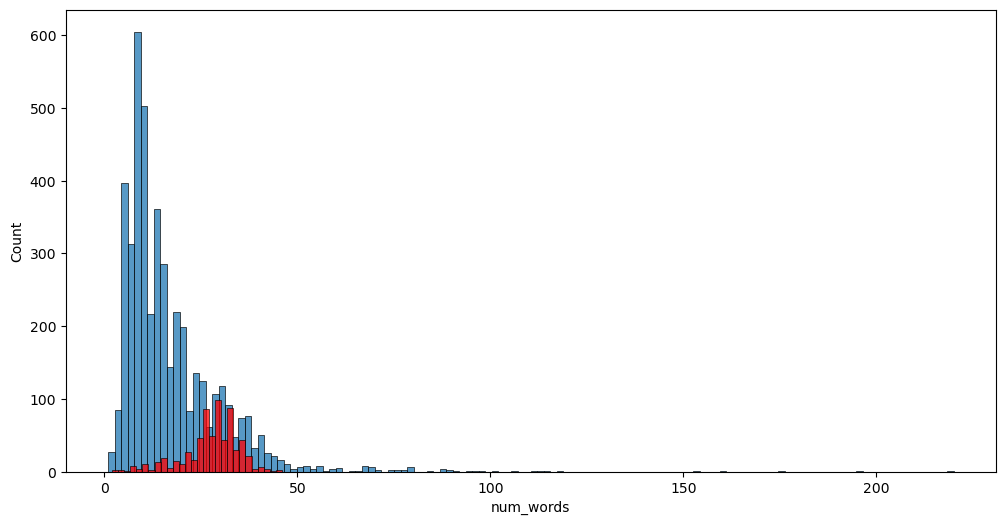

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

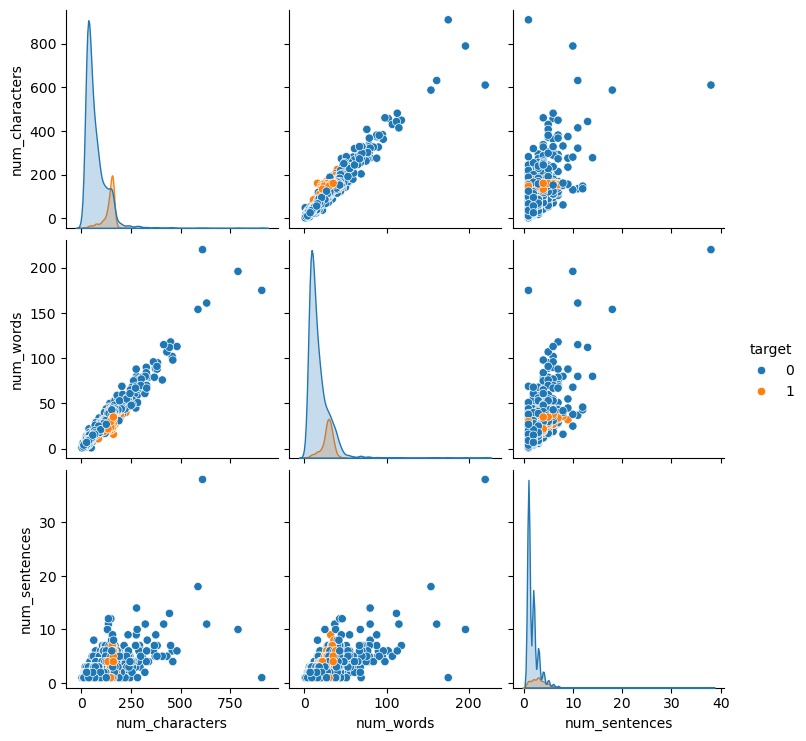

In [36]:
sns.pairplot(df, hue='target')

<Axes: >

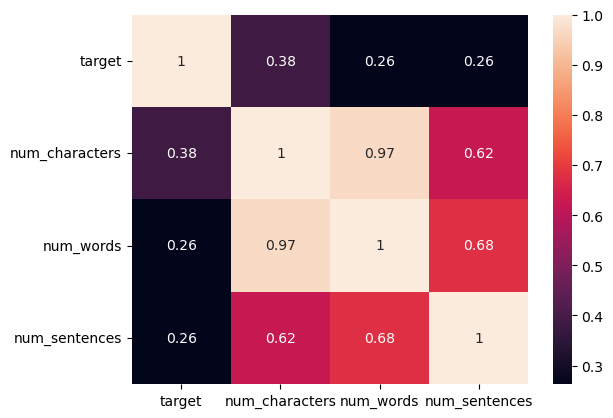

In [37]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [38]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return y        

In [39]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [41]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('studying')


'studi'

In [44]:
transform_text('Hi, how are you @ yogini ?')

['hi', 'yogini']

In [47]:
df['transformed_text']=df['text'].apply(transform_text)

In [48]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"


In [49]:
pip install WordCloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [50]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [51]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].astype(str).str.cat(sep=" "))

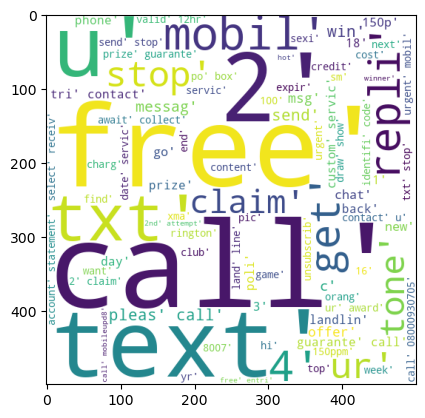

In [52]:
plt.imshow(spam_wc)

In [53]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].astype(str).str.cat(sep=" "))

In [54]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

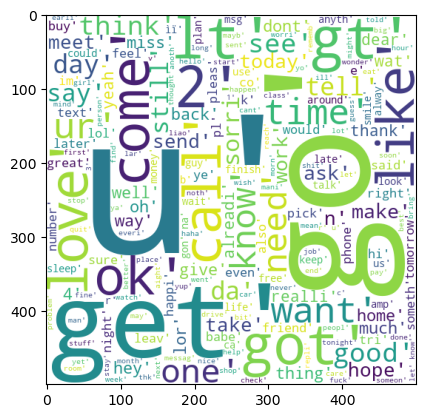

In [55]:
plt.imshow(ham_wc)

In [56]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"


In [57]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text']:
    for word in msg:
        spam_corpus.append(word)
    print(msg)

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18']
['freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv']
['winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour']
['mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030']
['six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info']
['urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18']
['xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', 'c

In [58]:
len(spam_corpus)

9939

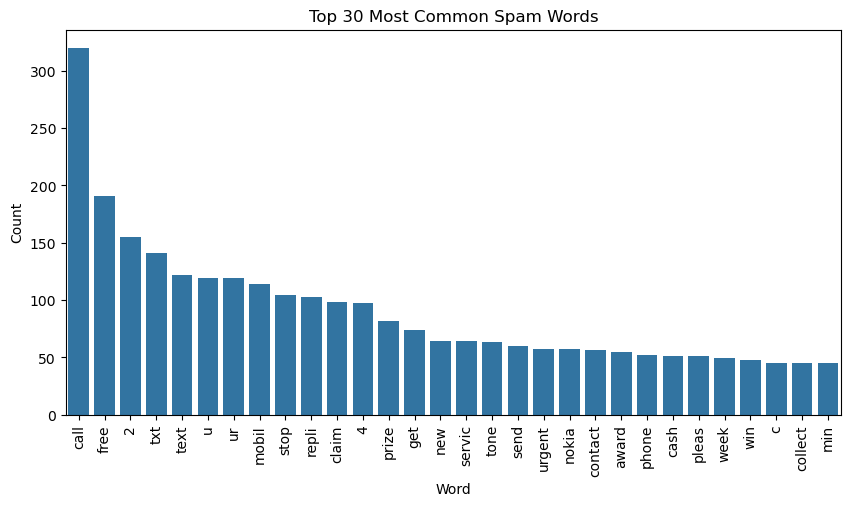

In [60]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create dataframe for top 30 most common words
spam_df = pd.DataFrame(Counter(spam_corpus).most_common(30), 
                       columns=['Word', 'Count'])

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x='Word', y='Count', data=spam_df)
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Spam Words')
plt.show()

In [61]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text']:
    for word in msg:
        ham_corpus.append(word)
    print(msg)

['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat']
['ok', 'lar', 'joke', 'wif', 'u', 'oni']
['u', 'dun', 'say', 'earli', 'hor', 'u', 'c', 'alreadi', 'say']
['nah', 'think', 'goe', 'usf', 'live', 'around', 'though']
['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent']
['per', 'request', 'mell', 'oru', 'minnaminungint', 'nurungu', 'vettam', 'set', 'callertun', 'caller', 'press', '9', 'copi', 'friend', 'callertun']
['gon', 'na', 'home', 'soon', 'want', 'talk', 'stuff', 'anymor', 'tonight', 'k', 'cri', 'enough', 'today']
['search', 'right', 'word', 'thank', 'breather', 'promis', 'wont', 'take', 'help', 'grant', 'fulfil', 'promis', 'wonder', 'bless', 'time']
['date', 'sunday']
['oh', 'k', 'watch']
['eh', 'u', 'rememb', '2', 'spell', 'name', 'ye', 'v', 'naughti', 'make', 'v', 'wet']
['fine', 'thatåõ', 'way', 'u', 'feel', 'thatåõ', 'way', 'gota', 'b']
['serious', 'spell', 'name']
['go', 'tri', '2', 'm

In [62]:
len(ham_corpus)

35404

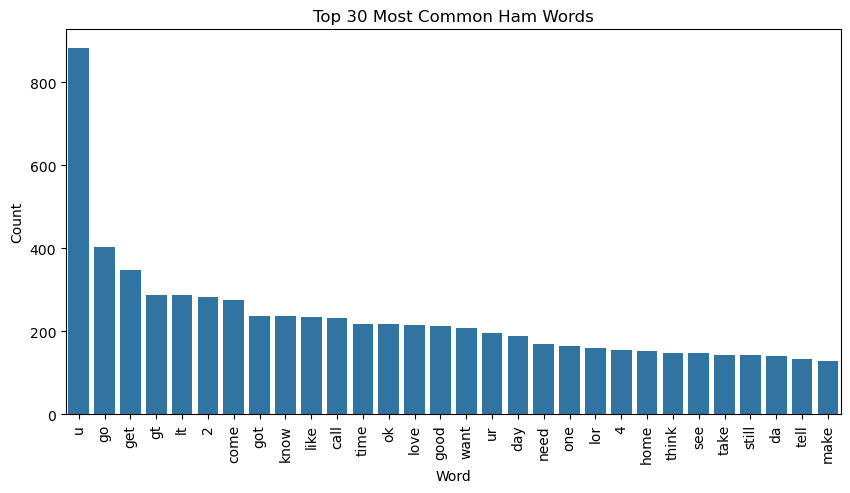

In [62]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create dataframe for top 30 most common words
ham_df = pd.DataFrame(Counter(ham_corpus).most_common(30), 
                       columns=['Word', 'Count'])

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x='Word', y='Count', data=ham_df)
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Ham Words')
plt.show()

In [140]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)
df['transformed_text'] = df['transformed_text'].fillna('').astype(str)
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [141]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [142]:
y=df['target'].values

In [143]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [146]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [147]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [148]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[784 112]
 [ 16 122]]
0.5213675213675214


In [149]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9787234042553191
[[889   7]
 [ 15 123]]
0.9461538461538461


In [107]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [108]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [109]:
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.naive_bayes import MultinomialNB

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import ExtraTreesClassifier

from xgboost import XGBClassifier

from sklearn.ensemble import GradientBoostingClassifier

In [110]:
svc =SVC(kernel='sigmoid', gamma=1.0)

knc= KNeighborsClassifier()

mnb= MultinomialNB()

dtc= DecisionTreeClassifier(max_depth=5)

lrc= LogisticRegression (solver='liblinear', penalty='11')

rfc= RandomForestClassifier(n_estimators=50, random_state=2)

abc = AdaBoostClassifier(n_estimators=50, random_state=2)

bc= BaggingClassifier(n_estimators=50, random_state=2)

etc= ExtraTreesClassifier(n_estimators=50, random_state=2)

gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)

xgb = XGBClassifier(n_estimators=50,random_state=2)



In [111]:
clfs = {

'SVC': svc,

'KN': knc,

'NB': mnb,

'DT': dtc,

'LR': lrc,

'RF': rfc,

'AdaBoost': abc,

'BgC': bc,

'ETC': etc,

'GBDT':gbdt,

'xgb':xgb
}    

In [112]:
from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clf, X_train, y_train, X_test,y_test):
    

    clf.fit(X_train, y_train)

    y_pred= clf.predict(X_test)

    accuracy= accuracy_score(y_test,y_pred)
    precision= precision_score(y_test,y_pred)
    return accuracy, precision





In [113]:
train_classifier(svc, X_train, y_train, X_test,y_test)

(0.9700193423597679, 0.9421487603305785)

In [114]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    try:
        current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
        print("For:", name)
        print("Accuracy:", current_accuracy)
        print("Precision:", current_precision)
        accuracy_scores.append(current_accuracy)
        precision_scores.append(current_precision)
    except Exception as e:
        print(f"Error with classifier {name}: {e}")

For: SVC
Accuracy: 0.9700193423597679
Precision: 0.9421487603305785
For: KN
Accuracy: 0.9052224371373307
Precision: 0.9761904761904762
For: NB
Accuracy: 0.9787234042553191
Precision: 0.9461538461538461
For: DT
Accuracy: 0.9332688588007737
Precision: 0.8415841584158416
Error with classifier LR: The 'penalty' parameter of LogisticRegression must be a str among {'l2', 'elasticnet', 'l1'} or None. Got '11' instead.
For: RF
Accuracy: 0.9738878143133463
Precision: 0.9826086956521739
For: AdaBoost
Accuracy: 0.9216634429400387
Precision: 0.8202247191011236
For: BgC
Accuracy: 0.9584139264990329
Precision: 0.8682170542635659
For: ETC
Accuracy: 0.9748549323017408
Precision: 0.9745762711864406
For: GBDT
Accuracy: 0.9506769825918762
Precision: 0.9306930693069307
For: xgb
Accuracy: 0.9680851063829787
Precision: 0.9487179487179487


In [115]:
print("Algorithms:", len(list(clfs.keys())))
print("Accuracy scores:", len(accuracy_scores))
print("Precision scores:", len(precision_scores))

Algorithms: 11
Accuracy scores: 10
Precision scores: 10


In [116]:

valid_algorithms = list(clfs.keys())[:len(accuracy_scores)]

performance_df = pd.DataFrame({
    'Algorithm': valid_algorithms,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
})

In [117]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.970019,0.942149
1,KN,0.905222,0.976190
2,NB,0.978723,0.946154
3,DT,0.933269,0.841584
4,LR,0.973888,0.982609
5,RF,0.921663,0.820225
6,AdaBoost,0.958414,0.868217
7,BgC,0.974855,0.974576
8,ETC,0.950677,0.930693
9,GBDT,0.968085,0.948718


In [118]:
performance_df1=pd.melt(performance_df, id_vars="Algorithm")

In [119]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.970019
1,KN,Accuracy,0.905222
2,NB,Accuracy,0.978723
3,DT,Accuracy,0.933269
4,LR,Accuracy,0.973888
5,RF,Accuracy,0.921663
6,AdaBoost,Accuracy,0.958414
7,BgC,Accuracy,0.974855
8,ETC,Accuracy,0.950677
9,GBDT,Accuracy,0.968085


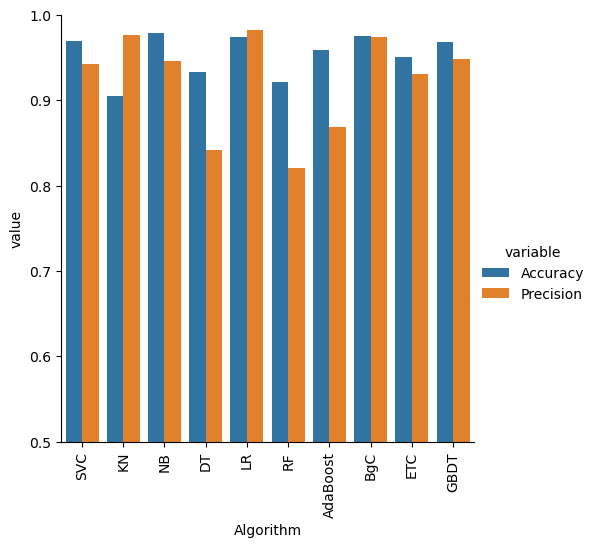

In [120]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [121]:
min_len = min(len(clfs), len(accuracy_scores), len(precision_scores))

temp_df = pd.DataFrame({
    'Algorithm': list(clfs.keys())[:min_len],
    'Accuracy_max_ft_3000': accuracy_scores[:min_len],
    'Precision_max_ft_3000': precision_scores[:min_len]
})

In [122]:
temp_df
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.970019,0.942149,0.970019,0.942149
1,KN,0.905222,0.976190,0.905222,0.976190
2,NB,0.978723,0.946154,0.978723,0.946154
3,DT,0.933269,0.841584,0.933269,0.841584
4,LR,0.973888,0.982609,0.973888,0.982609
5,RF,0.921663,0.820225,0.921663,0.820225
6,AdaBoost,0.958414,0.868217,0.958414,0.868217
7,BgC,0.974855,0.974576,0.974855,0.974576
8,ETC,0.950677,0.930693,0.950677,0.930693
9,GBDT,0.968085,0.948718,0.968085,0.948718


In [123]:
min_len = min(len(clfs), len(accuracy_scores), len(precision_scores))

temp_df = pd.DataFrame({
    'Algorithm': list(clfs.keys())[:min_len],
    'Accuracy_scaling': accuracy_scores[:min_len],
    'Precision_scaling': precision_scores[:min_len]
})

In [124]:
new_df=performance_df.merge(temp_df,on='Algorithm')

In [125]:
new_df_scaled=new_df.merge(temp_df,on='Algorithm')

In [126]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,SVC,0.970019,0.942149,0.970019,0.942149,0.970019,0.942149
1,KN,0.905222,0.976190,0.905222,0.976190,0.905222,0.976190
2,NB,0.978723,0.946154,0.978723,0.946154,0.978723,0.946154
3,DT,0.933269,0.841584,0.933269,0.841584,0.933269,0.841584
4,LR,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609
5,RF,0.921663,0.820225,0.921663,0.820225,0.921663,0.820225
6,AdaBoost,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
7,BgC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
8,ETC,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693
9,GBDT,0.968085,0.948718,0.968085,0.948718,0.968085,0.948718


In [128]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)
df['transformed_text'] = df['transformed_text'].fillna('').astype(str)
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [129]:
X=np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [130]:
X.shape

(5169, 3001)

In [131]:
y=df['target'].values

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
min_len = min(len(clfs), len(accuracy_scores), len(precision_scores))

temp_df = pd.DataFrame({
    'Algorithm': list(clfs.keys())[:min_len],
    'Accuracy_num_scores': accuracy_scores[:min_len],
    'Precision_num_scores': precision_scores[:min_len]
})

In [134]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_scores,Precision_num_scores
0,SVC,0.970019,0.942149,0.970019,0.942149,0.970019,0.942149,0.970019,0.942149
1,KN,0.905222,0.976190,0.905222,0.976190,0.905222,0.976190,0.905222,0.976190
2,NB,0.978723,0.946154,0.978723,0.946154,0.978723,0.946154,0.978723,0.946154
3,DT,0.933269,0.841584,0.933269,0.841584,0.933269,0.841584,0.933269,0.841584
4,LR,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609
5,RF,0.921663,0.820225,0.921663,0.820225,0.921663,0.820225,0.921663,0.820225
6,AdaBoost,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
7,BgC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
8,ETC,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693
9,GBDT,0.968085,0.948718,0.968085,0.948718,0.968085,0.948718,0.968085,0.948718


In [135]:
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)
from sklearn.ensemble import VotingClassifier

In [136]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [ ]:
clf=StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [150]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# ✅ Small sample dataset created manually
sample_df = pd.DataFrame({
    'message': [
        "Hello there",
        "Free money now!!!",
        "How are you doing today?",
        "Win a lottery instantly",
        "Let's meet tomorrow"
    ],
    'target': [0, 1, 0, 1, 0]   # 0 = ham, 1 = spam
})

# ✅ TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=300, stop_words='english')
X = tfidf.fit_transform(sample_df['message']).toarray()
y = sample_df['target'].values

# ✅ Train Naive Bayes model
model = MultinomialNB()
model.fit(X, y)

print("✅ Model trained successfully on sample data!")

✅ Model trained successfully on sample data!


In [152]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [153]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import pickle

# Load your dataset
df = pd.read_csv('spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']

# Encode labels
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Split data
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

# Vectorize
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)

# Train model
model = MultinomialNB()
model.fit(X_train_cv, y_train)

# Save both model and vectorizer
pickle.dump(cv, open('vectorizer.pkl', 'wb'))
pickle.dump(model, open('model.pkl', 'wb'))

print("✅ Model and vectorizer saved successfully!")

✅ Model and vectorizer saved successfully!
